# Project: TMDb Dataset Investigation and Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I will be investigating and analyzing is the TMDb movie dataset. This data contains information for over 10,000 movies including user ratings and revenue. As a movie buff, I am particularly intersted in discovering what correlations there are between a movies characteristics and it's overall success. 

For one, I would like to determine which genres produced the most critically acclaimed and financially successful movies year over year. For example, I'd like to determine if action movies have always historically been the highest grossing films, or if that is something that has only happened recently (i.e. last 10 years). Also, I would like to determine if a movies financial success is related to it's reviews or if movies that have poor reviews critically are still ones that have high earnings (i.e. a movie may not receive much critical acclaim but audiences still love it and go to see that movie in mass numbers).

This dataset is particularly interesting to me as it shows not only the dollars earned per film at the time the film was released, but also represents budget and revenue of the film adjusted for inflation over time which will allow me to better compare the success of each film.

### Import Statements

Below I will be importing the following libraries for use in my anlaysis: 

- Matplotlib
- NumPy
- Pandas
- pyplot (from matplotlib)
- datetime

In [141]:
#import pandas to easily access .csv dataset
import pandas as pd
#import numpy to more easily perform data analysis
import numpy as np
#import matplotlib inline to show graphs and charts in cells
% matplotlib inline
# importing datetime to work with string dates
from datetime import datetime
# import plt
from matplotlib import pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In the following section of the report I will load in my dataset using pandas and save it to the 'df' variable. Then I will determine if any columns will not be useful for my analysis and drop those from the investigation. From there I will determine if there are any missing values from relevant columns, update those values as necessary using tools like .mean to apply the average for all other non-null cells in that column. Following those steps, I will clean up and normalize any additional data as needed for columns identified as relevant to the analysis.

### General Properties

In [62]:
#importing dataset as df
df = pd.read_csv('tmdb-movies.csv')
#check data to make sure it imported -view first 5 rows
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Great! Now that my data has been imported correctly, I will take a look at some of it's other characteristics. See the comments in each cell below for detail on the functions I will run next.

In [63]:
# Now that the data has been imported I will use .shape to tell me how many rows/columns I am dealing with.
df.shape

(10866, 21)

In [64]:
#That's a lot of data! 10,866 rows with 21 columns is equal to 228,186 data points. 
# Now I want to take a look at all the column headers to see if there are any I don't need to perform my anlaysis.
# I'm thinking I can at least drop the actor and webpage columns, maybe even some more!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Ok, that's a lot of columns. Remember, I really want to anlayze information related to the year of release, revenue, budget, genre, and ratings. That means I won't need to use a lot of these columns such as id, imdb_id, cast, homepage, tagline, keywords, and production companies. In the next cell I'm going to drop all of those columns to make the dataset more useable for my needs. 

In [65]:
#droping columns I won't need
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'cast', 'tagline', 'keywords', 'production_companies', 'director'], axis=1, inplace=True)

In [66]:
#check to make sure columns were dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


In [67]:
# looks like I forgot to drop the overview column a descriptive text column explaining the film that is not really
# useful for my analysis.
df.drop(['overview'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


Cool, now I have all the columns I want to work with, however, looks like one of them is missing values - the 'genres' column. This data may be difficult to replace as it's a string so we cant use things like .mean to replace it with the average values. I'm going to do some investigation to see what the data for this column usually looks like and if there's any pattern for where it's missing.

In [68]:
# let's first look at a sample of what the genres column usually contains
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Interesting, the genres column contains string data that is split with a '|' denoting that each film can have multiple genres, 
now let's take a look at how many unique values there are in this column. 

In [69]:
# finding number of unique genre values 
pd.value_counts(df.genres)

Comedy                                               712
Drama                                                712
Documentary                                          312
Drama|Romance                                        289
Comedy|Drama                                         280
Comedy|Romance                                       268
Horror|Thriller                                      259
Horror                                               253
Comedy|Drama|Romance                                 222
Drama|Thriller                                       138
Comedy|Family                                        102
Action|Thriller                                      101
Thriller                                              93
Drama|Comedy                                          92
Animation|Family                                      90
Crime|Drama|Thriller                                  81
Crime|Drama                                           74
Comedy|Horror                  

In [78]:
df.genres.nunique()

2039

Ok, that's 2039 unique genre values for a dataset of 10,866. Tha'ts not going to work for my analysis. I'll need to come back
to this issue later when cleaning the data to parse out only the first value before the '|' in each row. This may not be the most accurate way of doing it, but it appears at least that the first value listed is the 'primary' genre while next values are other categories it could fall into as well. I think I'll also want to change the release dates from strings to date format for more use in my analysis. I will circle back to these issues in the data cleaning section below. For now, let's take a look at the rows where genres is missing.

In [70]:
# let's look at rows where genres is missing
# usally just printing the data would not be a great technique,
# however since this only relates to 23 rows I think it is acceptable.
df[df.genres.isnull()]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


OK, this data does not look to be useful for the analysis, for one thing all of these rows except 1 are missing data for budget and revenue which I will need to perform my analysis so I'm going to go ahead and remove these 23 rows from the dataset before continuing.

In [71]:
# dropping the null data from the dataset
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


### Data Cleaning

Now that I've removed all the unnecessary columns from the dataset as well as the null values I determined would not be useful
for my analysis I need to clean up the data a bit more. As discussed earlier, I will need to parse out only the first value from the genres column before the '|' and input those in a new column I will call 'primary_genre'. Then I will clean up the realease_date values from strings to datetime for use later in my Exploratory data analysis.

In [72]:
# First, let's parse out the data from the genres column
split_test = df['genres'][0]
print(split_test)
split_test.split('|')[0]

Action|Adventure|Science Fiction|Thriller


'Action'

In [73]:
# Since I tested the split above to ensure it worked, now I will apply the split to the dataframe
df['primary_genre'] = df['genres'].apply(lambda s:s.split('|')[0])
# test to make sure this worked correctly
pd.value_counts(df.primary_genre)

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               381
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: primary_genre, dtype: int64

In [77]:
# OK, that worked! So now I have a much more managable list of genres to deal with for my analyis. Let's see exactly how many
df.primary_genre.nunique()

20

Using the above two outputs we can see that that we have now succssfully cleaned up the data from having 2039 unique genres values to 20 unique primary_genre values. This is much more manageable and useful for our analysis. We can also see that he vast majority of these genres are either Drama, Comedy, or Action. Now for the final clean-up step I will take, let's convert the string dates to datetime and pull out only the year. 

In [115]:
# Let's test out how to get the year from the release_date column 
# date_test = pd.to_datetime(df['release_date'][0])
convert_date = datetime.strptime(df['release_date'][0], '%m/%d/%y')
year = convert_date.strftime('%Y')
month = convert_date.strftime('%b')
print(convert_date)
print(year)
print(month)
# print(df['release_date'][0])

2015-06-09 00:00:00
2015
Jun


As you can see above we have now successfully converted the string to a datetime object and then parsed that datetime object to only receive the year. This will be useful for my analysis so that we can now group data by year once I convert all string dates to this format and create new columns for that data. I think I'll also want a short text version of the month for the analysis as well as I'd like to see if different months have higher revenues.

In [122]:
# Let's now add two columns, one for the month and one for the year.
df['date'] = pd.to_datetime(df['release_date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'].head()
df['month'].head()

0     6
1     5
2     3
3    12
4     4
Name: month, dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 16 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
primary_genre     10843 non-null object
date              10843 non-null datetime64[ns]
year              10843 non-null int64
month             10843 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(4)
memory usage: 1.7+ MB


Great, now I have 3 new columns for the date in a datetime format and the year and month in integer format. I think I'm ready to start my exploratory data analysis!

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres had the highest average gross earnings adjusted for inflation?

For my first question, I want to explore which genres from the newly created primary_genre column had the highest average gross
revenue adjusted for inflation. This will allow me to look at the dataset as a whole and draw a conclusion about which genre typically earns the highest revenue. Then I want to look at whether or not this changed over time using the newly created year column.

In [128]:
# First, let's look at average adj_revenue by genre
# we need the following line of code to format the output in a more readable way removing scientific notation
pd.options.display.float_format = '{:,.2f}'.format
print(df.groupby('primary_genre').revenue_adj.mean())

primary_genre
Action             74,010,064.59
Adventure         166,535,606.16
Animation          76,714,425.16
Comedy             38,377,656.85
Crime              46,746,409.34
Documentary         2,150,125.06
Drama              35,786,224.55
Family             77,248,634.37
Fantasy            82,837,603.77
Foreign                     0.00
History            65,361,945.75
Horror             24,179,787.36
Music              38,079,071.99
Mystery            30,022,894.06
Romance            47,215,144.23
Science Fiction    99,518,096.06
TV Movie              748,578.24
Thriller           30,969,236.99
War                48,743,102.14
Western            47,307,389.85
Name: revenue_adj, dtype: float64


This is interesting, first I notice that the "Foreign" genre has an average of 0.00. This means that there are some missing adj_revenue values in the dataset. I want to remove those before continuing with the analysis.

In [131]:
# Let's see how many rows have adj revenue of 0.00. These should be removed from the dataset as they are outliers
df.query('revenue_adj == 0.00').count()

popularity        5993
budget            5993
revenue           5993
original_title    5993
runtime           5993
genres            5993
release_date      5993
vote_count        5993
vote_average      5993
release_year      5993
budget_adj        5993
revenue_adj       5993
primary_genre     5993
date              5993
year              5993
month             5993
dtype: int64

Wow, 5993 rows - that's almost half the dataset, let's remove thes before going forward.

In [133]:
# Remove rows with revenue_adj of 0.00
df.drop(df[df.revenue_adj == 0.00].index, inplace=True)
df.query('revenue_adj == 0.00').count()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4850 entries, 0 to 10848
Data columns (total 16 columns):
popularity        4850 non-null float64
budget            4850 non-null int64
revenue           4850 non-null int64
original_title    4850 non-null object
runtime           4850 non-null int64
genres            4850 non-null object
release_date      4850 non-null object
vote_count        4850 non-null int64
vote_average      4850 non-null float64
release_year      4850 non-null int64
budget_adj        4850 non-null float64
revenue_adj       4850 non-null float64
primary_genre     4850 non-null object
date              4850 non-null datetime64[ns]
year              4850 non-null int64
month             4850 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(7), object(4)
memory usage: 644.1+ KB


Ok, we've removed all rows with revenue_adj of 0 and now have 4,850 records containing all relevant column detail. Let's take another look at the average adj_revenue by genre.

In [135]:
print(df.groupby('primary_genre').revenue_adj.mean())

primary_genre
Action            142,637,579.04
Adventure         276,458,541.67
Animation         257,632,611.18
Comedy             84,759,796.41
Crime              86,040,492.55
Documentary        10,555,159.40
Drama              75,871,744.87
Family            227,016,394.89
Fantasy           165,675,207.53
History           136,948,838.71
Horror             68,285,510.60
Music             100,208,084.17
Mystery            72,170,418.40
Romance           104,547,819.38
Science Fiction   206,765,752.99
TV Movie           58,389,103.04
Thriller           76,411,534.47
War               130,720,137.56
Western            94,614,779.71
Name: revenue_adj, dtype: float64


Wow, removing the 0.00 values really impacted our outcome. Now we can see that Adventure and Animation really blow almost every other category out of the water with over $250 million in average adjusted revenue. Let's take a look at what this would look like graphically.

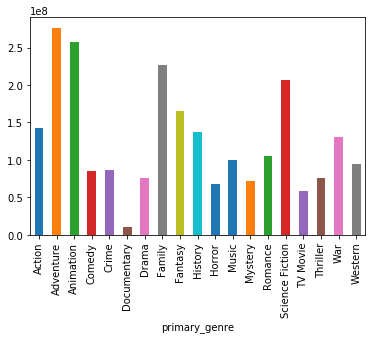

In [193]:
# Plot a graph of average adjusted revenue by genre
df.groupby('primary_genre').revenue_adj.mean().plot(kind='bar');

As we can see, Adventure, Animation, Family, and Science Fiction appear to be the highest grossing film genres over time. This may be because there were simply more of these types of movies released each year, so let's take a look at the total count of each type over time.

In [186]:
# print alist showing total count of releases by primary genre
print(df.groupby('primary_genre').primary_genre.count())

primary_genre
Action              825
Adventure           353
Animation           120
Comedy             1050
Crime               207
Documentary          88
Drama              1157
Family               49
Fantasy             136
History              21
Horror              324
Music                38
Mystery              52
Romance              84
Science Fiction     103
TV Movie              1
Thriller            199
War                  22
Western              21
Name: primary_genre, dtype: int64


As we can see this is actually not the case since action, adventure, and science fiction don't represent the largest number of releases throughout the dataset. Actually, Comedy and Drama are released more often but seem to have lower average adj_revenues.

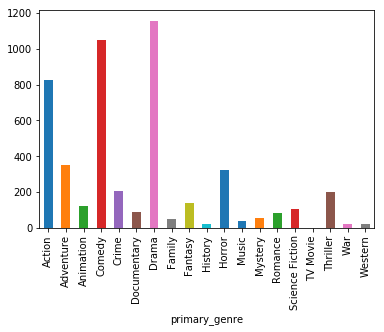

In [190]:
df.groupby('primary_genre').primary_genre.count().plot(kind='bar');

Let's also now look at average revenue over year to see if the average revenue increased or decreased over time.

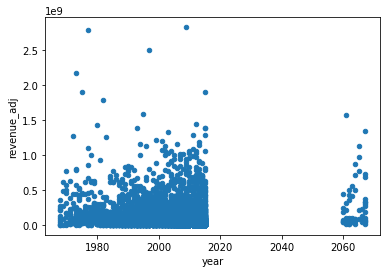

In [207]:
df.plot(x='year', y='revenue_adj', kind='scatter');

Ok, well, it's clear from the graph above that there are some outliers in the data and there are some years that are not possible as it's 2018 and some of these refer to 2020 and beyond. For now, given the time commitment for this exercise, let's ignore the outliers and focus on the pre-2020 data. The above shows us that the average revenue for films (even adjusted for inflation) has grown over time with a few outliers in each year that would be much higher earners than the rest of the films at that time.

### Which genre of film typically receives the highest ratings?

Above we saw that on average the Adventure, Action, and Science Fiction genres had higher average revenue than any other primary genre. Now, let's take a look at whether or not those relate to highest average rating.

In [198]:
# Let's look at the average rating by genre
df.groupby('primary_genre').vote_average.mean()

primary_genre
Action            5.96
Adventure         6.23
Animation         6.34
Comedy            6.01
Crime             6.41
Documentary       6.88
Drama             6.39
Family            5.99
Fantasy           6.00
History           6.39
Horror            5.72
Music             6.30
Mystery           6.14
Romance           6.39
Science Fiction   6.23
TV Movie          5.60
Thriller          5.99
War               6.46
Western           6.33
Name: vote_average, dtype: float64

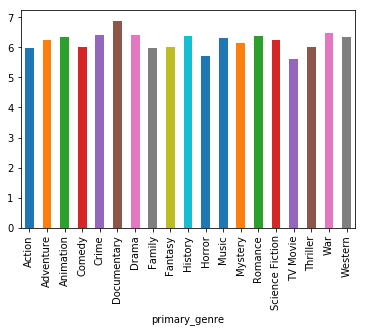

In [199]:
df.groupby('primary_genre').vote_average.mean().plot(kind='bar');

This is very interesting, the above tells us that while action, adventure, and animation earn more revenue on average than other series - it's actually Documentaries and War films that receive the highest ratings. Let's take a look at this over the years to see if on average ratings were higher or lower in prior years, again there seems to be an issue with the year conversion - so let's ignore the outliers.

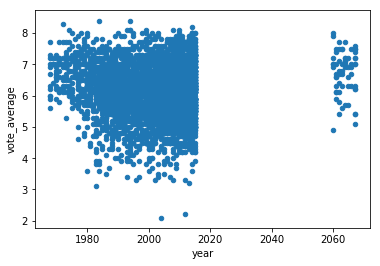

In [206]:
df.plot(x='year', y='vote_average', kind='scatter');

The above shows us that on average, the overall ratings of films has become much more varied as the years go on. Particularly, this shows us that in the 1980s and 1990s films received higher ratings than they did moving into the 2000s and 2010s.

<a id='conclusions'></a>
## Conclusions

First, I think that there is more that could be done here in terms of cleaning up this data to remove the outliers by year and most likely other categories, however, I was still able to draw some very interesting conclusions. 

The data tells us that on average Action and Adventure type movies (including Science Fiction) are higher earners than their counterparts but that those films generally have lower average ratings than those that earn less revenue. 

There is also a very interesting relationship between the quality of films over time, which we saw above to be declining, and the amount of revenue earned by films over time, which we saw to be increasing. I think that this is interesting as put more simply it states that while more people are going to the movies now than ever before the quality of those movies in the critics opinion is decreasing. 

Basically, this can be summed up in another way by saying that often the financial success of a film does not relate directly to crritics opinion, and in-fact, critics often prefer films that earn less and are less popular as we saw that Documentaries which are produced in fewer number and earn less than other genres receive the highest rating by critics over time. 

It is very interesting to prove through data analysis that critics and audiences often have very different opinions of films, audiences appear to seek entertainment while critics seek quality and interesting story-telling.

# Bibliography

- https://stackoverflow.com/questions/44885203/split-and-take-part-of-string-from-column-values-and-make-new-column-from-that-i
- https://stackoverflow.com/questions/14506583/suppress-output-of-object-when-plotting-in-ipython
- https://regexr.com/
- https://chrisalbon.com/python/data_wrangling/pandas_regex_to_create_columns/
- https://docs.python.org/3.3/howto/regex.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
- https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
- https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
- https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns
- https://pandas.pydata.org/pandas-docs/stable/options.html
- https://matplotlib.org/gallery/lines_bars_and_markers/categorical_variables.html![image.png](attachment:image.png)